<a href="https://colab.research.google.com/github/khw15/Machine-Learning-UMMI/blob/main/Praktikum%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proses data understanding adalah proses yang dilakukan untuk memahami data yang akan digunakan. Pada proses ini, kita akan melihat karakteristik data, statistik deskriptif, dan visualisasi data.

In [ ]:
# Melakukan import library pandas, numpy, dan matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Menentukan path file dataset
path = "dataset/dataset.csv" # Sesuaikan dengan lokasi file dataset.csv

# Membaca dataset dan memasukkannya ke dalam dataframe
df_epl = pd.read_csv(path)

# Fungsi untuk mengecek nilai kosong di dataframe atau di kolom Goals
def check_null(df, column=None):
    if column:
        is_null = df[column].isnull().values.any()
    else:
        is_null = df.isnull().values.any()
    return "Ada nilai kosong" if is_null else "Tidak ada nilai kosong"

# Mencetak hasil pengecekan
print(f"Apakah terdapat nilai kosong di dataframe? {check_null(df_epl)}")
print(f"Apakah terdapat nilai kosong di kolom Goals? {check_null(df_epl, 'goals')}")

Apakah terdapat nilai kosong di dataframe? Tidak ada nilai kosong
Apakah terdapat nilai kosong di kolom Goals? Tidak ada nilai kosong


In [ ]:
# Membaca 5 data teratas dari dataframe
df_epl.head()

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796


In [ ]:
# Membaca tipe data dari setiap kolom di dataframe
print(df_epl.dtypes)

Unnamed: 0        int64
id                int64
player_name      object
games             int64
time              int64
goals             int64
xG              float64
assists           int64
xA              float64
shots             int64
key_passes        int64
yellow_cards      int64
red_cards         int64
position         object
team_title       object
npg               int64
npxG            float64
xGChain         float64
xGBuildup       float64
dtype: object


In [ ]:
# Mem-print deskripsi statistik dari dataframe
df_epl.describe()

,Unnamed: 0,id,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,260.500000,4380.932950,19.643678,1420.068966,1.862069,2.000806,1.289272,1.376029,17.379310,12.963602,2.061303,0.091954,1.668582,1.821450,5.663368,3.455060
std,150.832689,3281.776121,11.619836,1031.604819,3.338851,3.317946,2.083350,1.886510,21.572664,16.164361,2.203661,0.295800,2.909929,2.931176,5.600249,3.376584
min,0.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.250000,839.750000,10.000000,470.250000,0.000000,0.074668,0.000000,0.049245,2.000000,1.000000,0.000000,0.000000,0.000000,0.074668,1.191391,0.720353
50%,260.500000,4627.000000,21.000000,1342.000000,1.000000,0.737295,0.000000,0.691122,10.000000,7.000000,2.000000,0.000000,0.500000,0.715585,4.252738,2.656397
75%,390.750000,7690.500000,30.000000,2319.000000,2.000000,2.053378,2.000000,2.050509,23.750000,19.000000,3.000000,0.000000,2.000000,1.945799,8.308002,5.254647
max,521.000000,9552.000000,38.000000,3420.000000,23.000000,22.174859,14.000000,11.474996,138.000000,95.000000,12.000000,2.000000,19.000000,19.130183,28.968234,18.323006


In [ ]:
# Mendeskripsikan statistik dari kolom "goals"
df_epl["goals"].describe()

count    522.000000
mean       1.862069
std        3.338851
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       23.000000
Name: goals, dtype: float64

In [ ]:
# Menghitung rata-rata dari kolom "goals"
mean_goals = df_epl["goals"].mean()
print(f"Rata-rata gol yang dicetak oleh pemain adalah {mean_goals}")

Rata-rata gol yang dicetak oleh pemain adalah 1.8620689655172413


In [ ]:
# Menghitung median dari kolom "goals"
median_goals = df_epl["goals"].median()
print(f"Median gol yang dicetak oleh pemain adalah {median_goals}")

Median gol yang dicetak oleh pemain adalah 1.0


In [ ]:
# Mencari gol paling sedikit yang dicetak oleh pemain dan nama pemainnya, dan timnya
min_goals = df_epl["goals"].min()
min_goals_player = df_epl[df_epl["goals"] == min_goals]
min_goals_player_name = min_goals_player["player_name"].values[0]
min_goals_player_team = min_goals_player["team_title"].values[0]
print(f"Gol paling sedikit yang dicetak oleh pemain adalah {min_goals} oleh {min_goals_player_name} dari {min_goals_player_team}")

Gol paling sedikit yang dicetak oleh pemain adalah 0 oleh Bernd Leno dari Arsenal


In [ ]:
# Mencari gol paling banyak yang dicetak oleh pemain dan nama pemainnya, dan timnya
max_goals = df_epl["goals"].max()
max_goals_player = df_epl[df_epl["goals"] == max_goals]
max_goals_player_name = max_goals_player["player_name"].values[0]
max_goals_player_team = max_goals_player["team_title"].values[0]
print(f"Gol paling banyak yang dicetak oleh pemain adalah {max_goals} oleh {max_goals_player_name} dari {max_goals_player_team}")

Gol paling banyak yang dicetak oleh pemain adalah 23 oleh Harry Kane dari Tottenham


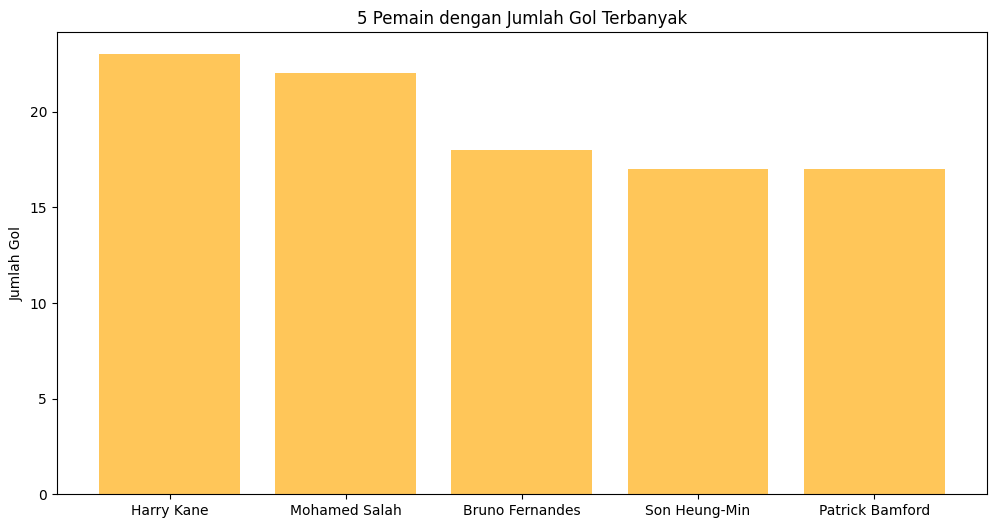

In [ ]:
# Mencetak 5 pemain dengan gol terbanyak
top_5_goals = df_epl[["player_name", "goals"]].sort_values(by="goals", ascending=False).head()

# Membuat bar chart dari 5 pemain dengan gol terbanyak
plt.figure(figsize=(12, 6))
plt.bar(top_5_goals["player_name"], top_5_goals["goals"], color="#FFC659")
plt.ylabel("Jumlah Gol")
plt.title("5 Pemain dengan Jumlah Gol Terbanyak")
plt.show()

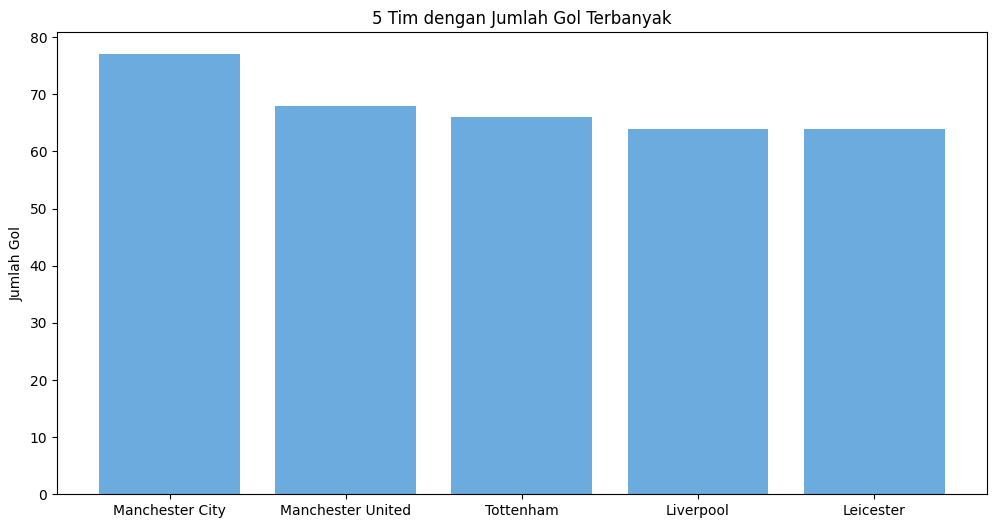

In [ ]:
# Statistik jumlah gol yang dicetak berdasarkan tim
goals_by_team = df_epl.groupby("team_title")["goals"].sum()
goals_by_team = goals_by_team.reset_index()
goals_by_team = goals_by_team.sort_values(by="goals", ascending=False)

# Membuat bar chart dari 5 tim dengan jumlah gol terbanyak
plt.figure(figsize=(12, 6))
plt.bar(goals_by_team["team_title"].head(), goals_by_team["goals"].head(), color="#6CABDD")
plt.ylabel("Jumlah Gol")
plt.title("5 Tim dengan Jumlah Gol Terbanyak")
plt.show()